# Setup and Load Data

In [1]:
import tensorflow as tf
import os

In [10]:
# Avoid OutOfMemory(OOM) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

##### 1.1 Remove doggy images

In [7]:
import cv2
import imghdr
import matplotlib.pyplot as plt

C:\Users\Mehul\AppData\Local\Temp\ipykernel_19320\2011824555.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [12]:
img_dir = 'images'

In [13]:
img_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [14]:
img = cv2.imread(os.path.join(img_dir, 'happy', '960x0.jpg'))
img.shape

(640, 960, 3)

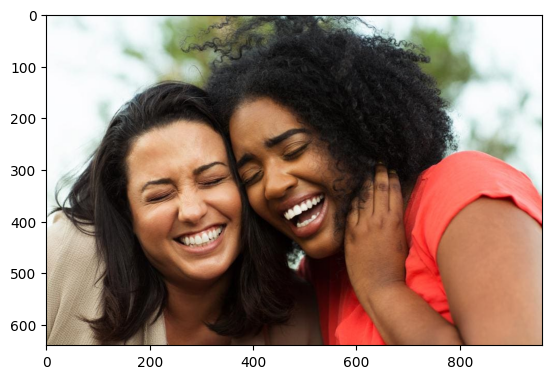

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
for img_class in os.listdir(img_dir):
    for image in os.listdir(os.path.join(img_dir, img_class)):
        img_path = os.path.join(img_dir, img_class, image)
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in img_exts:
                print(f"Image not in ext list {img_path}")
                os.remove(img_path)
        except:
            print(f"Issue with image {img_path}")
            # os.remove(img_path)


##### 1.2 Load Data

In [17]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = tf.keras.utils.image_dataset_from_directory('images')
data

Found 186 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [21]:
# Get another batch from the iterator
batch = data_iterator.next()

In [22]:
# Images represented in numpy arrays form
batch[0]

array([[[[ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ],
         ...,
         [ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ]],

        [[ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ],
         ...,
         [ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ]],

        [[ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ],
         ...,
         [ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ],
         [ 33.       ,  37.       ,  40.       ]],

        ...,

        [[ 34.       ,  38.       ,  4

In [23]:
# Class 0: Happy People
# Class 1: Sad People
batch[1]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

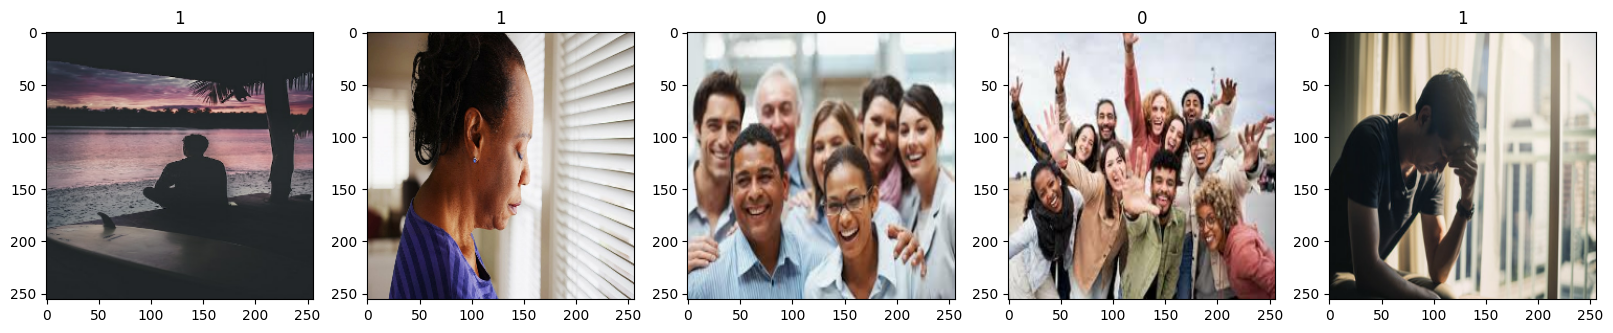

In [24]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocessing Data

##### 2.1 Scale Data

In [25]:
data = data.map(lambda x, y: (x/255, y))

In [26]:
scaled_iterator = data.as_numpy_iterator()

In [27]:
batch = scaled_iterator.next()

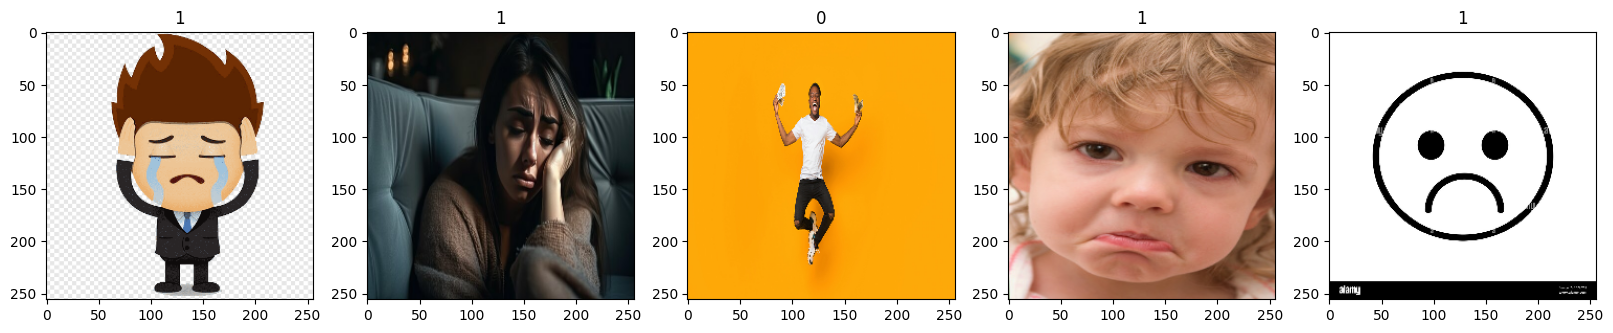

In [28]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

##### 2.2 Split Data

In [29]:
len(data)

6

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [31]:
train_size+test_size+val_size

6

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model

##### 3.1 Building Deeping learning model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [36]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

##### 3.2 Train

In [38]:
logdir = "logs"

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


4/4 [==============================] - 7s 709ms/step - loss: 1.0295 - accuracy: 0.5234 - val_loss: 0.9580 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 3s 578ms/step - loss: 0.8172 - accuracy: 0.4531 - val_loss: 0.6281 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 3s 573ms/step - loss: 0.6430 - accuracy: 0.5391 - val_loss: 0.7550 - val_accuracy: 0.3438
Epoch 4/20
4/4 [==============================] - 3s 578ms/step - loss: 0.5893 - accuracy: 0.6641 - val_loss: 0.6015 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 3s 588ms/step - loss: 0.5689 - accuracy: 0.7422 - val_loss: 0.4640 - val_accuracy: 0.8438
Epoch 6/20
4/4 [==============================] - 3s 582ms/step - loss: 0.4367 - accuracy: 0.8125 - val_loss: 0.5072 - val_accuracy: 0.6875
Epoch 7/20
4/4 [==============================] - 3s 594ms/step - loss: 0.4150 - accuracy: 0.7812 - val_loss: 0.3709 - val_accuracy: 0.9062
Epoch 8/20
4/4 [==

In [41]:
hist.history

{'loss': [1.0294864177703857,
  0.8171854019165039,
  0.6429620981216431,
  0.589316725730896,
  0.5688748359680176,
  0.4366844594478607,
  0.4149743318557739,
  0.39252910017967224,
  0.33429092168807983,
  0.28859010338783264,
  0.2069379985332489,
  0.1294519305229187,
  0.20701856911182404,
  0.16525857150554657,
  0.15800821781158447,
  0.0939687192440033,
  0.05336199700832367,
  0.03288598358631134,
  0.03917274251580238,
  0.019473858177661896],
 'accuracy': [0.5234375,
  0.453125,
  0.5390625,
  0.6640625,
  0.7421875,
  0.8125,
  0.78125,
  0.875,
  0.875,
  0.890625,
  0.90625,
  0.9609375,
  0.9140625,
  0.953125,
  0.9453125,
  0.9921875,
  0.9921875,
  0.9921875,
  1.0,
  1.0],
 'val_loss': [0.9579676389694214,
  0.6281161308288574,
  0.7549842596054077,
  0.60145103931427,
  0.4639529287815094,
  0.5072458982467651,
  0.37090376019477844,
  0.2528926730155945,
  0.2889394760131836,
  0.10632193088531494,
  0.12180574238300323,
  0.3474353551864624,
  0.15272852778434753

##### 3.3 Plot Performance

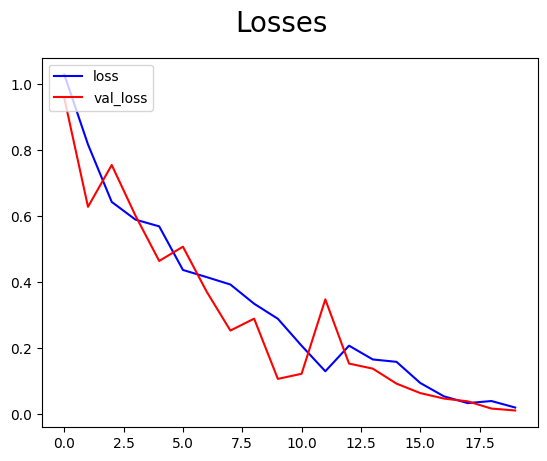

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'],  color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
plt.suptitle('Losses', fontsize=20)
plt.legend(loc='upper left')
plt.show()

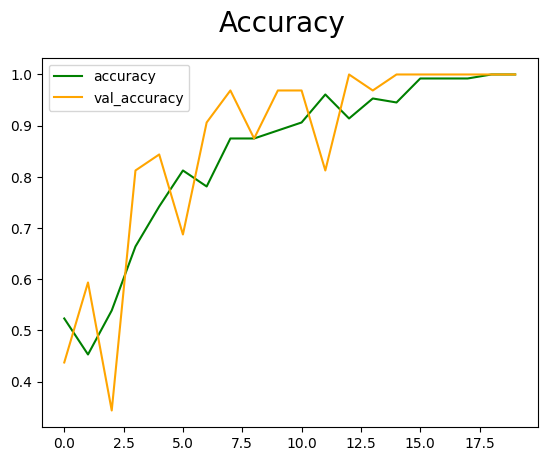

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],  color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 4. Evaluate Performance

##### 4.1 Evaluate

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 370ms/step


In [47]:
print(f"Precision: {pre.result()} \nRecall: {re.result()} \nAccuracy: {acc.result()}")

Precision: 1.0 
Recall: 1.0 
Accuracy: 1.0


##### 4.2 Test

In [6]:
import cv2

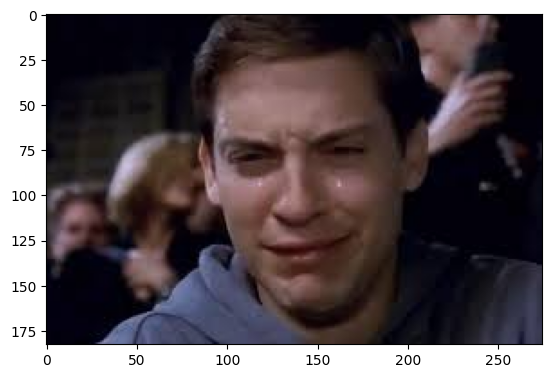

In [9]:
img = cv2.imread('sad_test2.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

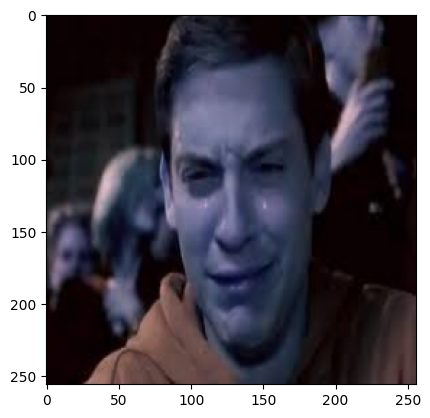

In [10]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 67ms/step


In [82]:
yhat

array([[0.900363]], dtype=float32)

In [83]:
if yhat>0.5:
    print("Predicted Class is Sad")
else:
    print("Predicted Class is Happy")

Predicted Class is Sad


# Save Model

In [2]:
from tensorflow.keras.models import load_model

In [3]:
model.save(os.path.join('models', 'HappySadClassifier.h5'))

NameError: name 'model' is not defined

In [4]:
new_model = load_model(os.path.join('models', 'HappySadClassifier.h5'))

In [11]:
new_yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 510ms/step


In [12]:
if new_yhat>0.5:
    print("Predicted Class is Sad")
else:
    print("Predicted Class is Happy")

Predicted Class is Sad
